In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
plt.style.use('willo')

In [2]:
gang = pd.read_csv('../data/data_big_june2015/gang_data.csv')
gang['Timestamp']=pd.to_datetime([val.rsplit('-',1)[0] for val in gang['Timestamp']])

In [3]:
slurm = pd.read_csv('../data/data_big_june2015/slurm_data.csv',error_bad_lines=True,header=None)
slurm[1]=pd.to_datetime(slurm[1])
slurm[2]=pd.to_datetime(slurm[2])

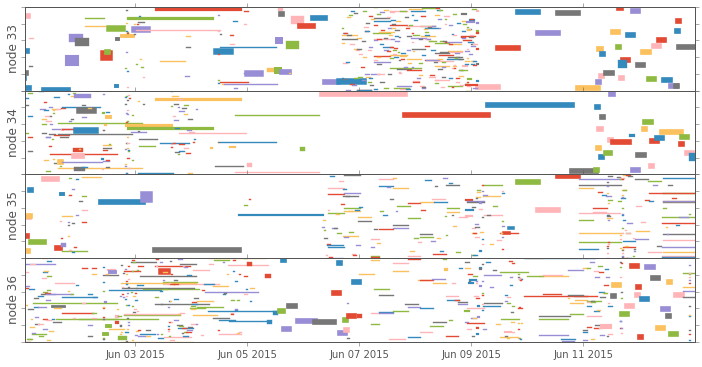

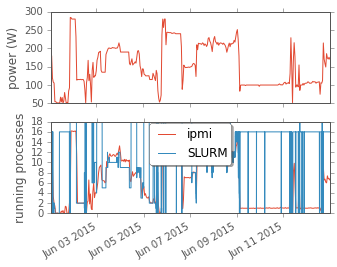

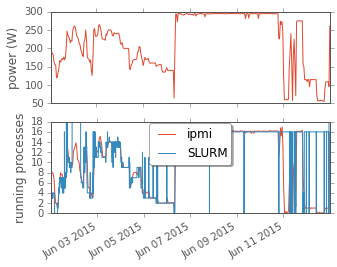

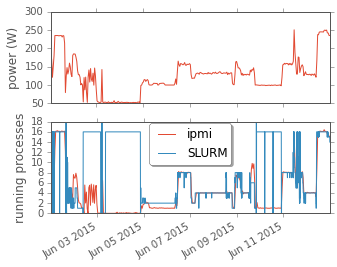

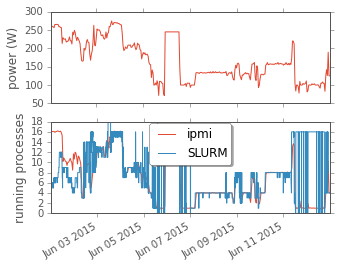

In [17]:
strt = 33
todo = 4
ind = 0;
f, ax = plt.subplots(todo, sharex=True, sharey=True, figsize=(12, 6))
for index in range(strt,strt+todo):
    
    pick = 'midway'+str(index).zfill(3)
    sub = pick+'|Timestamp'  
    subgang = gang.filter(regex=sub)
    subgang.columns=["".join(col.lstrip(pick).split()) for col in subgang.columns]
    subslurm = slurm[slurm[0]==pick]
    
    if('domain_a_avgpwr' in subgang):
        fig = plt.figure(figsize=(5,4))
        ax1=plt.subplot(211)
        val = subgang['domain_a_avgpwr']
        if(index % 2 ==0):
            val = subgang['domain_b_avgpwr']
        plt.plot(subgang['Timestamp'],val)
        plt.ylabel('power (W)')
        
        ts = pd.date_range(subgang['Timestamp'].irow(0), subgang['Timestamp'].irow(-1), freq='10S')
        dt = np.zeros(ts.shape)
        dtcpu = np.zeros(ts.shape)
        for k in subslurm.iterrows():
            id1 = np.argmin(np.abs(ts - k[1][1]))
            id2 = np.argmin(np.abs(ts - k[1][2]))
            if(ts[id1]<k[1][1]):
                id1=id1+1
            for spt in range(id1,id2):
                dt[spt]=dt[spt]+1
                dtcpu[spt]=dtcpu[spt]+k[1][8]
            if (k[1][1]<ts[id2] and k[1][2]>ts[id2]):
                dt[id2]=dt[id2]+1
                dtcpu[id2]=dtcpu[id2]+k[1][8]
        ax3=plt.subplot(212)
        plt.plot(subgang['Timestamp'],subgang['proc_run'],label='ipmi')
        plt.plot(ts,dtcpu,label='SLURM')
        ax3.set_ylim((0,18))
        ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True, shadow=True)
        plt.ylabel('running processes')
        fig.autofmt_xdate()
#         ax4=plt.subplot(313)
#         plt.plot(subgang['Timestamp'],subgang['cpu_user']/100.0)
#         ax4.set_title('CPU usage')
        
        for k in subslurm.iterrows():
            v = random.random()
            ax[ind].plot([k[1][1],k[1][2]],[v,v],linewidth=np.log(1+k[1][8])*2)
        ax[ind].set_xlim(ax1.get_xlim())
        ax[ind].set_ylabel('node '+str(index))
        ind = ind+1
        
        #plt.plot(ts,dt)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.setp([a.get_yticklabels() for a in f.axes], visible=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
f.savefig("../figures/usage_viz.png",dpi=200)

f2 = plt.figure(4)
f2.savefig("../figures/usage_plot.png",dpi=200)